In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [80]:
##load train data
raw_train = pd.read_csv('train.csv')
df=raw_train.copy()

In [3]:
raw_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
df.shape

(1460, 81)

(array([  11.,   38.,   99.,  232.,  273.,  218.,  176.,  104.,   93.,
          58.,   42.,   35.,   24.,   10.,   17.,    8.,    7.,    4.,
           2.,    1.,    1.,    2.,    1.,    0.,    2.,    0.,    0.,
           0.,    0.,    2.]),
 array([  34900.        ,   58903.33333333,   82906.66666667,
         106910.        ,  130913.33333333,  154916.66666667,
         178920.        ,  202923.33333333,  226926.66666667,
         250930.        ,  274933.33333333,  298936.66666667,
         322940.        ,  346943.33333333,  370946.66666667,
         394950.        ,  418953.33333333,  442956.66666667,
         466960.        ,  490963.33333333,  514966.66666667,
         538970.        ,  562973.33333333,  586976.66666667,
         610980.        ,  634983.33333333,  658986.66666667,
         682990.        ,  706993.33333333,  730996.66666667,  755000.        ]),
 <a list of 30 Patch objects>)

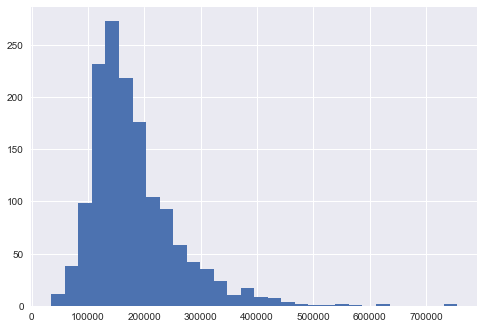

In [9]:
plt.hist(df.SalePrice, bins=30)

In [24]:
np.corrcoef(df.LotArea, df.GarageArea)
#######This is just a small example, they are not corelated as firstly expected.

array([[ 1.        ,  0.18040276],
       [ 0.18040276,  1.        ]])

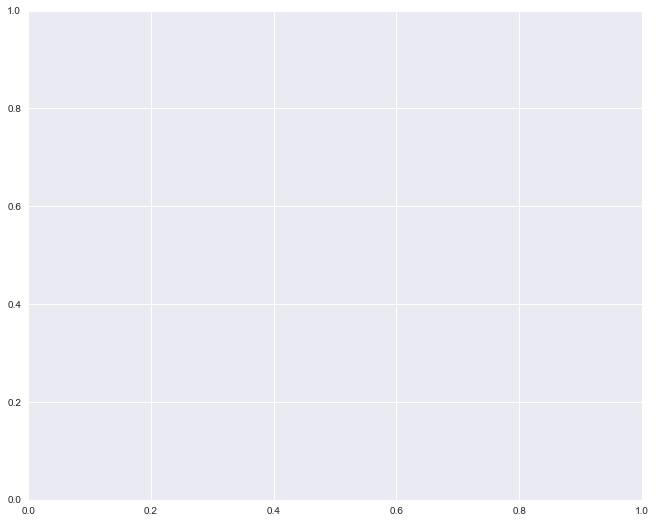

In [28]:
f, ax = plt.subplots(figsize=(11, 9))

In [52]:
df['SaleType']=df.SaleType.astype('category')

In [81]:
#df.SaleType

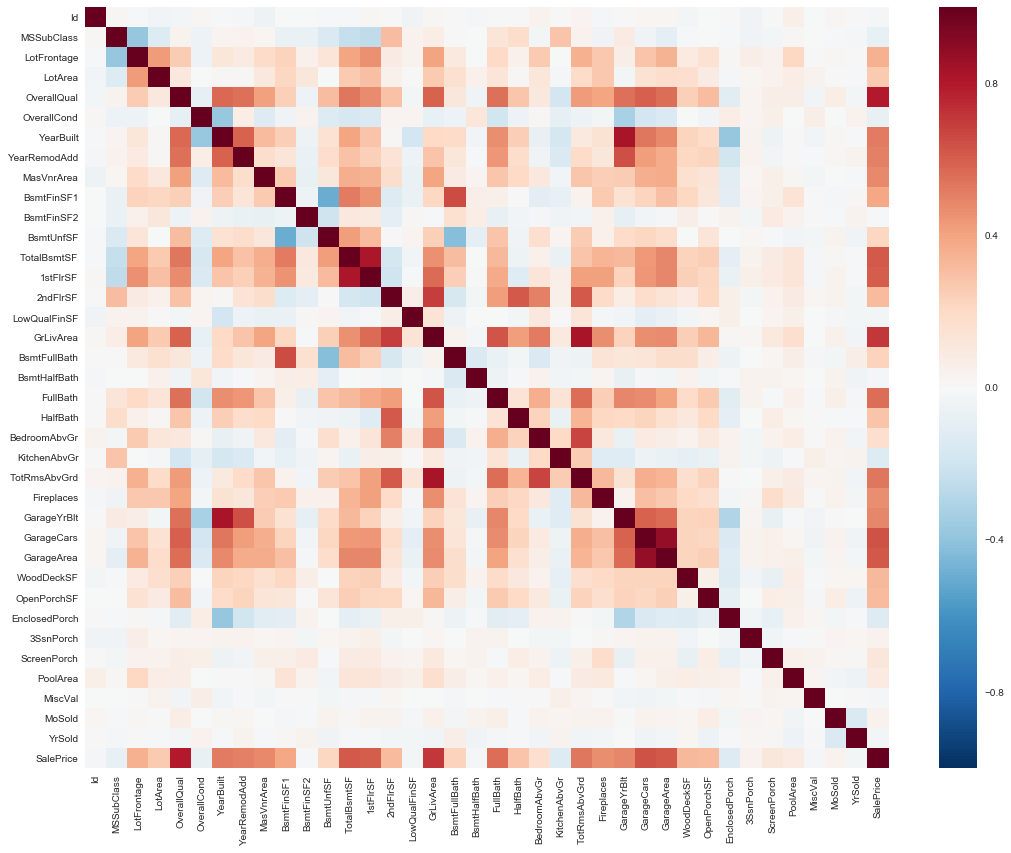

In [59]:
f, ax = plt.subplots(figsize=(18, 14))
sns.heatmap(df.corr())

In [62]:
from sklearn import linear_model

In [11]:
#extract the columns without any 'NA's as 
df_no_na=df.dropna(axis=1, how='any')

In [12]:
df_no_na.shape


(1460, 62)

In [13]:
#create a df with no 
temp=df.loc[df.LotArea<30000,]

In [63]:
df_no_na

(1438, 81)

In [76]:
grid = list(np.arange(0.1, 10, 0.01))

In [79]:
x_train, x_test, y_train, y_test = train_test_split(df_no_na.iloc[:,0:-1], df_no_na.iloc[:,-1], test_size=0.2)

In [78]:
Lm_R_CV = linear_model.RidgeCV(alphas = grid)

In [ ]:
Lm_R_CV_out = cross_val_predict(Lm_R_CV,

In [15]:
temp.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [84]:
#split the df_no_na into train ans test sets
#x_train, x_test, y_train, y_test = train_test_split(temp.iloc[:,0:-1], temp.iloc[:,-1], test_size=0.2)

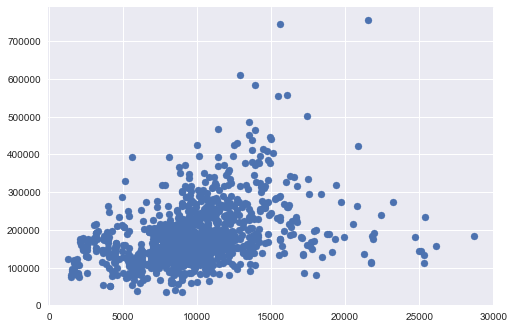

In [17]:
#the relationship between LotArea and Price
import math
x_train
plt.scatter(x_train.iloc[:,4], y_train)

In [32]:
from sklearn.linear_model import LinearRegression as Lreg

In [35]:
Lreg(temp)

LinearRegression(copy_X=True,
         fit_intercept=        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg
1        2          20       RL         80.0     9600   Pave   NaN      Reg
2        3          60       RL         68.0    1... 142125
1459       0      6   2008        WD         Normal     147500

[1438 rows x 81 columns],
         n_jobs=1, normalize=False)

In [121]:
#reg.score(x_test.iloc[:,3], y_test)

In [82]:
#np.asarray(x_test.iloc[:,3])

In [83]:
#sns.heatmap(x_train, center=0)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [49]:
#train = temp.loc[range(round(temp.shape[0]*0.8)),:]
random.seed

In [41]:
x_train=temp.LotArea

In [ ]:
reg.fit(temp)

In [23]:

# %matplotlib inline

# # load the R package ISLR
# infert = pd.rpy.common.importr("ISLR")

# # load the Auto dataset
# auto_df = pd.rpy.common.load_data('train')

# # calculate the correlation matrix
# corr = auto_df.corr()

# # plot the heatmap
# sns.heatmap(corr, 
#         xticklabels=corr.columns,
#         yticklabels=corr.columns)